<a href="https://colab.research.google.com/github/Moiz-36/Machine-learning/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics
import sklearn.datasets

In [17]:
house_data = sklearn.datasets.fetch_california_housing()


In [18]:
house_data_df=pd.DataFrame(house_data.data,columns=house_data.feature_names)
house_data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
house_data_df['Target']=pd.DataFrame(house_data.target)
house_data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


heat map construction it is used to fin the collreation
ther two type of collreation 1 is postive collreation and 2 is negative collreation

<Axes: >

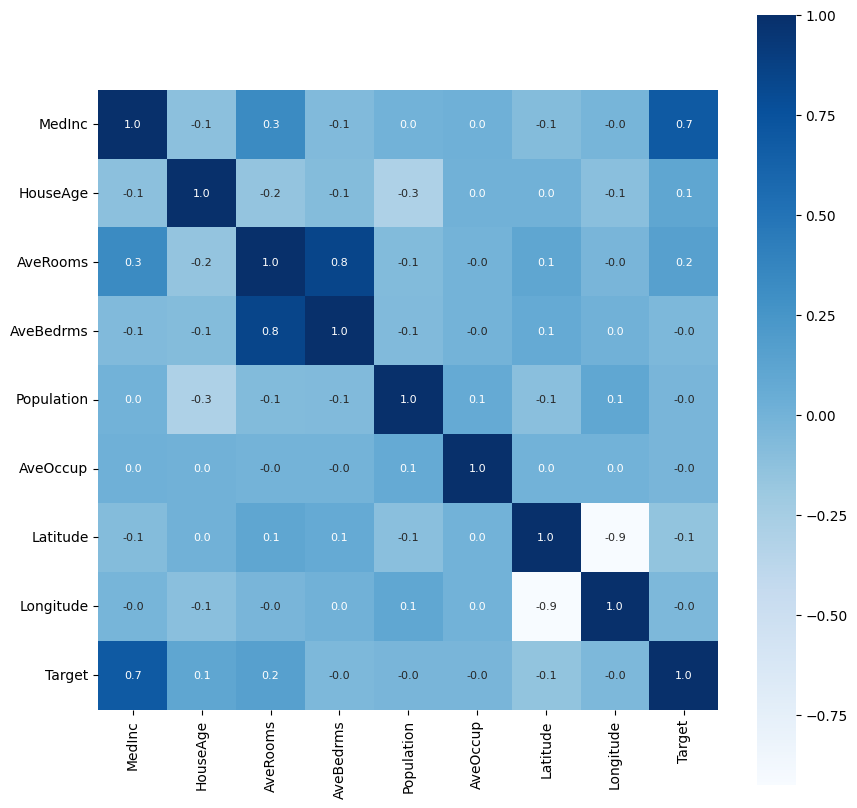

In [23]:
collreation=house_data_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(collreation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [24]:
x=house_data_df.drop(['Target'],axis=1)
y=house_data_df['Target']

test traion split


In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
x.shape,xtrain.shape,xtest.shape

((20640, 8), (16512, 8), (4128, 8))

In [29]:
model=XGBRegressor()

In [30]:
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
train_prediction=model.predict(xtrain)

In [43]:
#R squred Value
r2_train=metrics.r2_score(ytrain,train_prediction)
print('R squred value',r2_train)
#mean absolute value
mean_train=metrics.mean_absolute_error(ytrain,train_prediction)
print('mean absolute value',mean_train)


R squred value 0.943650140819218
mean absolute value 0.1933648700612105


Shape of ytrain: (16512,)
Shape of train_prediction: (16512,)


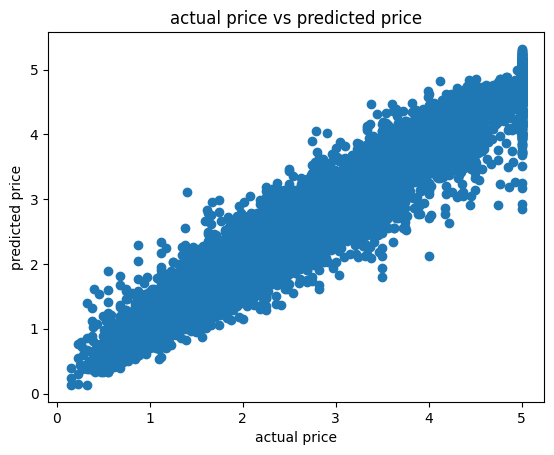

In [44]:
print("Shape of ytrain:", ytrain.shape)
print("Shape of train_prediction:", train_prediction.shape)
plt.scatter(ytrain.values,train_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.show()

In [36]:
test_prediction=model.predict(xtest)


In [37]:
#R squred Value
r2_test=metrics.r2_score(ytest,test_prediction)
print('R squred value',r2_test)
#mean absolute value
mean_test=metrics.mean_absolute_error(ytest,test_prediction)
print('mean absolute value',mean_test)

R squred value 0.8338000331788725
mean absolute value 0.3108631800268186
